<h4>This problem is a variation of a pattern recognition problem presented by Widrow and Hoff in 1960. It is a simple symbol recognition problem with three letters T, G and F, in an original form and in a shifted form</h4>

<h4>The 6 input vectors (x) and the corresponding target vectors (d) in the training set are below.</h4>

<h4>Assume that the network has 2 hidden layer neurons and all continuous perceptrons use the bipolar activation function f_2(v) = (1-e^-v) / (1+e^-v). Assign -1 to all augmented inputs. </h4>

<h4>Assume that the learning constant is n = 0.25 and the initial random output layer weight matrix W_1 and hidden layer weight matrix W_hat(1) (wp) are below.</h4>

<h4>Using the error back propagation training calculate the next weight updates W(2), Wp(2)</h4>

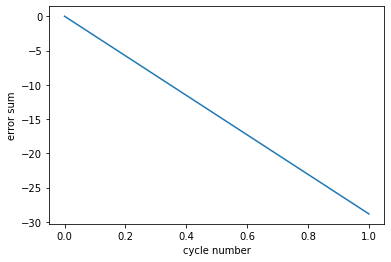

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

x = [np.matrix('1; 1; 1; -1; -1; 1; -1; -1; -1; 1; -1; -1; -1; 1; -1; -1; -1'),\
     np.matrix('1; 1; 1; -1; 1; -1; -1; -1; 1; 1; 1; -1; 1; 1; 1; -1; -1'), \
     np.matrix('1; 1; 1; -1; 1; 1; -1; -1; 1; -1; -1; -1; 1; -1; -1; -1; -1'), \
     np.matrix('-1; 1; 1; 1; -1; -1; 1; -1; -1; -1; 1; -1; -1; -1; 1; -1; -1'), \
     np.matrix('-1; 1; 1; 1; -1; 1; -1; -1; -1; 1; 1; 1; -1; 1; 1; 1; -1'), \
     np.matrix('-1; 1; 1; 1; -1; 1; 1; -1; -1; 1; -1; -1; -1; 1; -1; -1; -1')]

d = [np.matrix('1; -1; -1'), np.matrix('-1; 1; -1'), np.matrix('-1; -1; 1'), \
     np.matrix('1; -1; -1'), np.matrix('-1; 1; -1'), np.matrix('-1; -1; 1')]
n = 0.25
v = []
cr = []
e = 0

w = np.matrix('0.2007 -0.0280 -0.1871; 0.5522 0.2678 -0.7830; 0.4130 -0.5299 0.6420')
wp = np.matrix('-0.2206 0.2139 0.4764 -0.1886 0.5775 -0.7873 -0.2943 0.9803 -0.5945 -0.2076 -0.6024 0.7611 0.9635 -0.1627 -0.0503 0.3443 -0.4812; 0.1932 0.8436 -0.6475 0.3365 0.1795 -0.0542 0.6263 -0.7222 -0.6026 0.3556 -0.9695 -0.2030 -0.0680 0.6924 0.5947 0.6762 0.2222')


for k in range(10):
    if k % 6 == 0:
        cr.append(e)
        e = 0
    for i in range(5):
        y = [None, None]
        z = [None, None, None]
        dz = [None, None, None]
        dy = [None, None]
        vp = wp * x[i]
        #print(vp)
        for j in range(len(vp)):
            y[j] = ((1-math.exp(-vp[j]))/(1 + math.exp(-vp[j])))
            dy[j] = 0.5*(1-y[j]**2)
        #print(y)
        #print('dy',dy)
        dy = np.matrix(dy)
        y = np.matrix(y)
        y = np.vstack([y.T, -1])
        #print(y)

        
        v = w * y
        #print('v is', v)
        for j in range(len(v)):
            z[j] = ((1-math.exp(-v[j]))/(1 + math.exp(-v[j])))
            dz[j] = 0.5*(1-z[j]**2)
        z = np.matrix(z)
        dz = np.matrix(dz)
        #print('z is:', z)
        #print('dz is:', dz)
        r = (d[i] - z.T)
        #print('r is:', r)
        delta = r*dz
        #print('detla is:', delta.diagonal())
        #print('dy is', dy)
        #print('w is', w[:,1:3])

        dp = delta.T*w[:,1:3]*dy.T
        #print('delta p is:', dp)
        deltawp = n*dp*x[i].T
        #print('delta wp', deltawp)
        w = w + n*delta*y
        wp = wp + deltawp[:2,:]
        #print('w', i+2, 'is:', w)
        #print('wp', i+2, 'is:', wp)

        p = np.sum(0.5*(d[i] - z)**2)
        #print('PPPPPPPPPPPPPPPPPPPPPPPPPP', p)
        e = e + p #cycle error
        #print('EEEEEEEEEEEEEEEEEEEE', e)

plt.figure()
plt.xlabel('cycle number')
plt.ylabel('error sum')
plt.plot(cr)
plt.show()
    


<img src='at21.png'>
<h4> The above training set was trained with the same set of initial random output layer weight matrix W(1) and hidden layer weight matrix Wp(1) as above and a learning constant of n=0.25. The training set was recycled when necessary.</h4>

<h4> Determine the final weight metrices W_f = W(1201) and WP_f = Wp(1201) after 200 cycles. Plot the cycle error for this training exercise.</h4>

<img src='at22.png'>

<p> Matlab code for the above </p>
<img src='at22matlab.png'>

<h4>Calculate the output vector z which is generated from the above feature input vector. How would the neural network classify this feature input vector?</h4>

<p> output vector z and matlab code: </p>
<img src='at222.png'>
<img src='at222matlab.png'>

<h1> QUESTION 2</h1>
<h4>Design a Convolutional Neural Network (CNN) to classify dog and cat images where each class contains 300 images. Firstly, scale all the images to the uniform size.</h4>
    
<h4>Then, create a simple CNN to classify them, the ratio of training and testing is 7:3. Use cat and dog images as the dataset.</h4>

In [ ]:
# load dogs vs cats dataset, reshape and save to a new file
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# define location of dataset
folder = 'train/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
	# determine class
	output = 0.0
	if file.startswith('cat'):
		output = 1.0
	# load image
	photo = load_img(folder + file, target_size=(150, 150))
	# convert to numpy array
	photo = img_to_array(photo)
	# store
	photos.append(photo)
	labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('dogs_vs_cats_photos.npy', photos)
save('dogs_vs_cats_labels.npy', labels)



In [7]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# create directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.3
# copy training dataset images into subdirectories
src_directory = 'train/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('cat'):
		dst = dataset_home + dst_dir + 'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + dst_dir + 'dogs/'  + file
		copyfile(src, dst)

In [8]:
# baseline model for dogs vs cats dataset
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, ZeroPadding2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential 

def define_model():
    model = Sequential()
    # block 1
    #setting padding to 2 with zeropadding layer, (conv2d() layer does not allow custom padding)
    model.add(ZeroPadding2D(2, input_shape=(150, 150, 3)))
    #conv2d with 24 filters, kernel = 5, stride = 1 (default), activation function = relu
    model.add(Conv2D(24, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='valid'))
    #maxpooling with filter size 2 and stride 2
    model.add(MaxPooling2D((2, 2), strides=(2,2)))
    
    # block 2
    #setting padding to 2 with zeropadding layer, (conv2d() layer does not allow custom padding)
    model.add(ZeroPadding2D(2))
    #conv2d with 28 filters, kernel = 5, stride = 1 (default), activation function = relu
    model.add(Conv2D(28, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='valid'))
    model.add(MaxPooling2D((2, 2), strides=(2,2)))
    
    # block 3
    #setting padding to 2 with zeropadding layer, (conv2d() layer does not allow custom padding)
    model.add(ZeroPadding2D(2))
    #conv2d with 32 filters, kernel = 5, stride = 1 (default), activation function = relu
    model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='valid'))
    model.add(MaxPooling2D((2, 2), strides=(2,2)))

    # block 4
    #setting padding to 2 with zeropadding layer, (conv2d() layer does not allow custom padding)
    model.add(ZeroPadding2D(2))
    #conv2d with 36 filters, kernel = 5, stride = 1 (default), activation function = relu
    model.add(Conv2D(36, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='valid'))
    model.add(MaxPooling2D((2, 2), strides=(2,2)))
    
    model.add(Flatten())
    #model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    #Batch Normalisation is used after the fully connected layer
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))
    
    opt = Adam(lr=0.001) #set optimiser to Adam and learning rate = 0.001
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot learning curves
def plots(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

def run_test():
    model = define_model()
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    
    # prepare iterators
    train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
        class_mode='binary', batch_size=64, target_size=(150, 150))
    test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
        class_mode='binary', batch_size=64, target_size=(150, 150))
    
    # fit model, where epochs = 50
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
    
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    
    # plot accuracy and loss
    plots(history)
     
run_test()

Found 424 images belonging to 2 classes.
Found 176 images belonging to 2 classes.
> 77.273


<h4> Optimise the CNN model to improve the accuracy </h4>

In [9]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, ZeroPadding2D, Dropout
from keras.optimizers import Adam, SGD, Nadam
from keras.preprocessing.image import ImageDataGenerator


# define cnn model

def define_model():
    model = Sequential()
    # block 1
    #changed conv2d to 32 filters, 3 kernel, removed zero padding.
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3)))
    #changed maxpooling to 4,4 and strides 2,2
    model.add(MaxPooling2D((4, 4), strides=(2,2)))
    
    # block 2
    #changed conv2d to 64 filters, 3 kernel, removed zero padding.
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    #changed maxpooling to 4,4 and strides 2,2
    model.add(MaxPooling2D((4, 4), strides=(2,2)))
    
    # block 3
    #changed conv2d to 128 filters, 3 kernel, removed zero padding.
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    #changed maxpooling to 4,4 and strides 2,2
    model.add(MaxPooling2D((4, 4), strides=(2,2)))

    # block 4
    #changed conv2d to 256 filters, 3 kernel, removed zero padding.
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    #changed maxpooling to 4,4 and strides 2,2
    model.add(MaxPooling2D((4, 4), strides=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    opt = Nadam(lr=0.001)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

#run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0,)
    # prepare iterators
    train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
        class_mode='binary', batch_size=64, target_size=(150, 150))
    test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
        class_mode='binary', batch_size=64, target_size=(150, 150))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
     
# entry point, run the test harness
run_test_harness()

Found 424 images belonging to 2 classes.
Found 176 images belonging to 2 classes.
> 71.591
